### roboflow 데이터 다운

In [1]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=2201f5d8d27d8ad08172782248c771ecc85200bc86d6bf9d08397850afbbf61c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Su

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="5jKLHm7UnT3ImvUFdehp")
project = rf.workspace("wonkeun-jung-rbg1y").project("ingredients-detector-tqvxr")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to ingredients-detector-1 in yolov8:: 100%|██████████| 18106/18106 [00:02<00:00, 8233.03it/s]


In [5]:
!cat /content/ingredients-detector-1/data.yaml

names:
- apple
- apricot
- asparagus
- avocado
- bacon
- banana
- bean
- beef
- blackberry
- blueberry
- bread
- broccoli
- butter
- cabbage
- candy
- carrot
- cashew
- cauliflower
- celery
- cheese
- chicken breast
- chicken thigh
- chicken wing
- chicken
- chili
- chilli
- chocolate
- coconut
- cookie
- corn
- cream
- cucumber
- egg
- eggplant
- fennel
- fig
- fish
- flour
- garlic
- ginger
- grape
- grapefruit
- ham
- icecream
- kiwi
- lamb
- leek
- lemon
- lettuce
- lime
- mango
- meatball
- milk
- mushroom
- noodle
- noodles
- oil
- onion
- orange
- pea
- peach
- pear
- pepper
- pineapple
- pork
- potato
- pumpkin
- radish
- rib
- rice
- salmon
- salt
- sausage
- spinach
- spring onion
- strawberry
- sugar
- sweet potato
- tofu
- tomato
- watermelon
- yogurt
- zucchini
nc: 83
roboflow:
  license: CC BY 4.0
  project: ingredients-detector-tqvxr
  url: https://universe.roboflow.com/wonkeun-jung-rbg1y/ingredients-detector-tqvxr/dataset/1
  version: 1
  workspace: wonkeun-jung-rbg1y
t

In [4]:
!pip install PyYAML

In [6]:
class_names = [
    "apple", "apricot", "asparagus", "avocado", "bacon", "banana", "bean", "beef",
    "blackberry", "blueberry", "bread", "broccoli", "butter", "cabbage", "candy",
    "carrot", "cashew", "cauliflower", "celery", "cheese", "chicken breast",
    "chicken thigh", "chicken wing", "chicken", "chili", "chilli", "chocolate",
    "coconut", "cookie", "corn", "cream", "cucumber", "egg", "eggplant", "fennel",
    "fig", "fish", "flour", "garlic", "ginger", "grape", "grapefruit", "ham",
    "icecream", "kiwi", "lamb", "leek", "lemon", "lettuce", "lime", "mango",
    "meatball", "milk", "mushroom", "noodle", "noodles", "oil", "onion", "orange",
    "pea", "peach", "pear", "pepper", "pineapple", "pork", "potato", "pumpkin",
    "radish", "rib", "rice", "salmon", "salt", "sausage", "spinach", "spring onion",
    "strawberry", "sugar", "sweet potato", "tofu", "tomato", "watermelon", "yogurt", "zucchini"
]


num_classes = len(class_names)
print(num_classes)

83


In [7]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml

data = { 'train' : '/content/ingredients-detector-1/train/images/',
         'val' : '/content/ingredients-detector-1/valid/images/',
         'test' : '/content/ingredients-detector-1/test/images',
         'names': class_names,
         'nc': len(class_names)
}

with open('/content/ingredients-detector-1/data.yaml', 'w') as f:
  yaml.dump(data, f)


with open('/content/ingredients-detector-1/data.yaml', 'r') as f:
  food_yaml = yaml.safe_load(f)
  display(food_yaml)

{'names': ['apple',
  'apricot',
  'asparagus',
  'avocado',
  'bacon',
  'banana',
  'bean',
  'beef',
  'blackberry',
  'blueberry',
  'bread',
  'broccoli',
  'butter',
  'cabbage',
  'candy',
  'carrot',
  'cashew',
  'cauliflower',
  'celery',
  'cheese',
  'chicken breast',
  'chicken thigh',
  'chicken wing',
  'chicken',
  'chili',
  'chilli',
  'chocolate',
  'coconut',
  'cookie',
  'corn',
  'cream',
  'cucumber',
  'egg',
  'eggplant',
  'fennel',
  'fig',
  'fish',
  'flour',
  'garlic',
  'ginger',
  'grape',
  'grapefruit',
  'ham',
  'icecream',
  'kiwi',
  'lamb',
  'leek',
  'lemon',
  'lettuce',
  'lime',
  'mango',
  'meatball',
  'milk',
  'mushroom',
  'noodle',
  'noodles',
  'oil',
  'onion',
  'orange',
  'pea',
  'peach',
  'pear',
  'pepper',
  'pineapple',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'rib',
  'rice',
  'salmon',
  'salt',
  'sausage',
  'spinach',
  'spring onion',
  'strawberry',
  'sugar',
  'sweet potato',
  'tofu',
  'tomato',
  'wat

In [8]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 9.6 MB/s eta 0:00:00


In [9]:
!pip install --upgrade pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
supervision 0.12.0 requires pillow<9.0.0,>=8.4.0, but you have pillow 10.0.0 which is incompatible.


In [10]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 24.7/166.8 GB disk)


In [11]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 424MB/s]


## 모델 학습


In [14]:
yaml_path = '/content/ingredients-detector-1/data.yaml'

In [16]:
results = model.train(data=yaml_path,
                      imgsz=320,
                      batch=64,
                      epochs=100,
                      seed = 42,
                      mixup = 0.1, # image mixup (probability)
                      shear = 0.1, # image shear (+/- deg),
                      plots= True

                     )

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ingredients-detector-1/data.yaml, epochs=100, patience=50, batch=64, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=Fa

In [23]:
!yolo task=detect mode=predict model=./runs/detect/train2/weights/best.pt conf=0.4 source=/content/ingredients-detector-1/test/images save=True

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25887817 parameters, 0 gradients

image 1/966 /content/ingredients-detector-1/test/images/-133_jpg.rf.9d57b963d43f08613aaa46c815f48c8e.jpg: 320x320 3 beefs, 15.9ms
image 2/966 /content/ingredients-detector-1/test/images/-135_jpg.rf.434841d776e871da3c972767d92079e2.jpg: 320x320 1 cheese, 16.0ms
image 3/966 /content/ingredients-detector-1/test/images/-140_jpg.rf.e883c9db8fec8d38410344714e4dbb24.jpg: 320x320 1 cheese, 15.9ms
image 4/966 /content/ingredients-detector-1/test/images/-151_jpg.rf.46e78e6a881fbb3c2544dc210083fc5e.jpg: 320x320 2 beefs, 15.8ms
image 5/966 /content/ingredients-detector-1/test/images/-16_jpg.rf.13c55adb84c421a532673309134a136d.jpg: 320x320 1 celery, 15.9ms
image 6/966 /content/ingredients-detector-1/test/images/-193_jpg.rf.1b26c3de4279b39025d741a39c6cc898.jpg: 320x320 1 beef, 15.9ms
image 7/966 /content/ingredients-detector-1/test/images/-2023-0

In [18]:
# 위 코드 실행시 로케일 관련 에러가 난다면 코드 실행 후 위에 다시 실행

# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# 결과 이미지 경로 확인
results_dir = '/content/runs/detect/train2'
!ls $results_dir

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch9090.jpg
events.out.tfevents.1690473804.72ee2c24e8c2.4085.1  train_batch9091.jpg
F1_curve.png					    train_batch9092.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


In [26]:
import shutil

# 결과물을 구글 드라이브에 복사
import shutil

# 결과 이미지를 구글 드라이브로 복사
shutil.copytree(results_dir, '/content/drive/MyDrive/YOLOv8m_train_results')

'/content/drive/MyDrive/YOLOv8m_train_results'

In [28]:
import zipfile
import os

# 폴더 경로와 압축 파일 이름 설정
folder_path = '/content/runs'
zip_file_name = 'YOLOv8m_results_best.zip'

# 폴더를 압축
with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for foldername, subfolders, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zipf.write(file_path, os.path.relpath(file_path, folder_path))

# 압축 파일 다운로드
from IPython.display import FileLink
FileLink(zip_file_name)

/content/YOLOv8m_results_best.zip

### 성능 평가

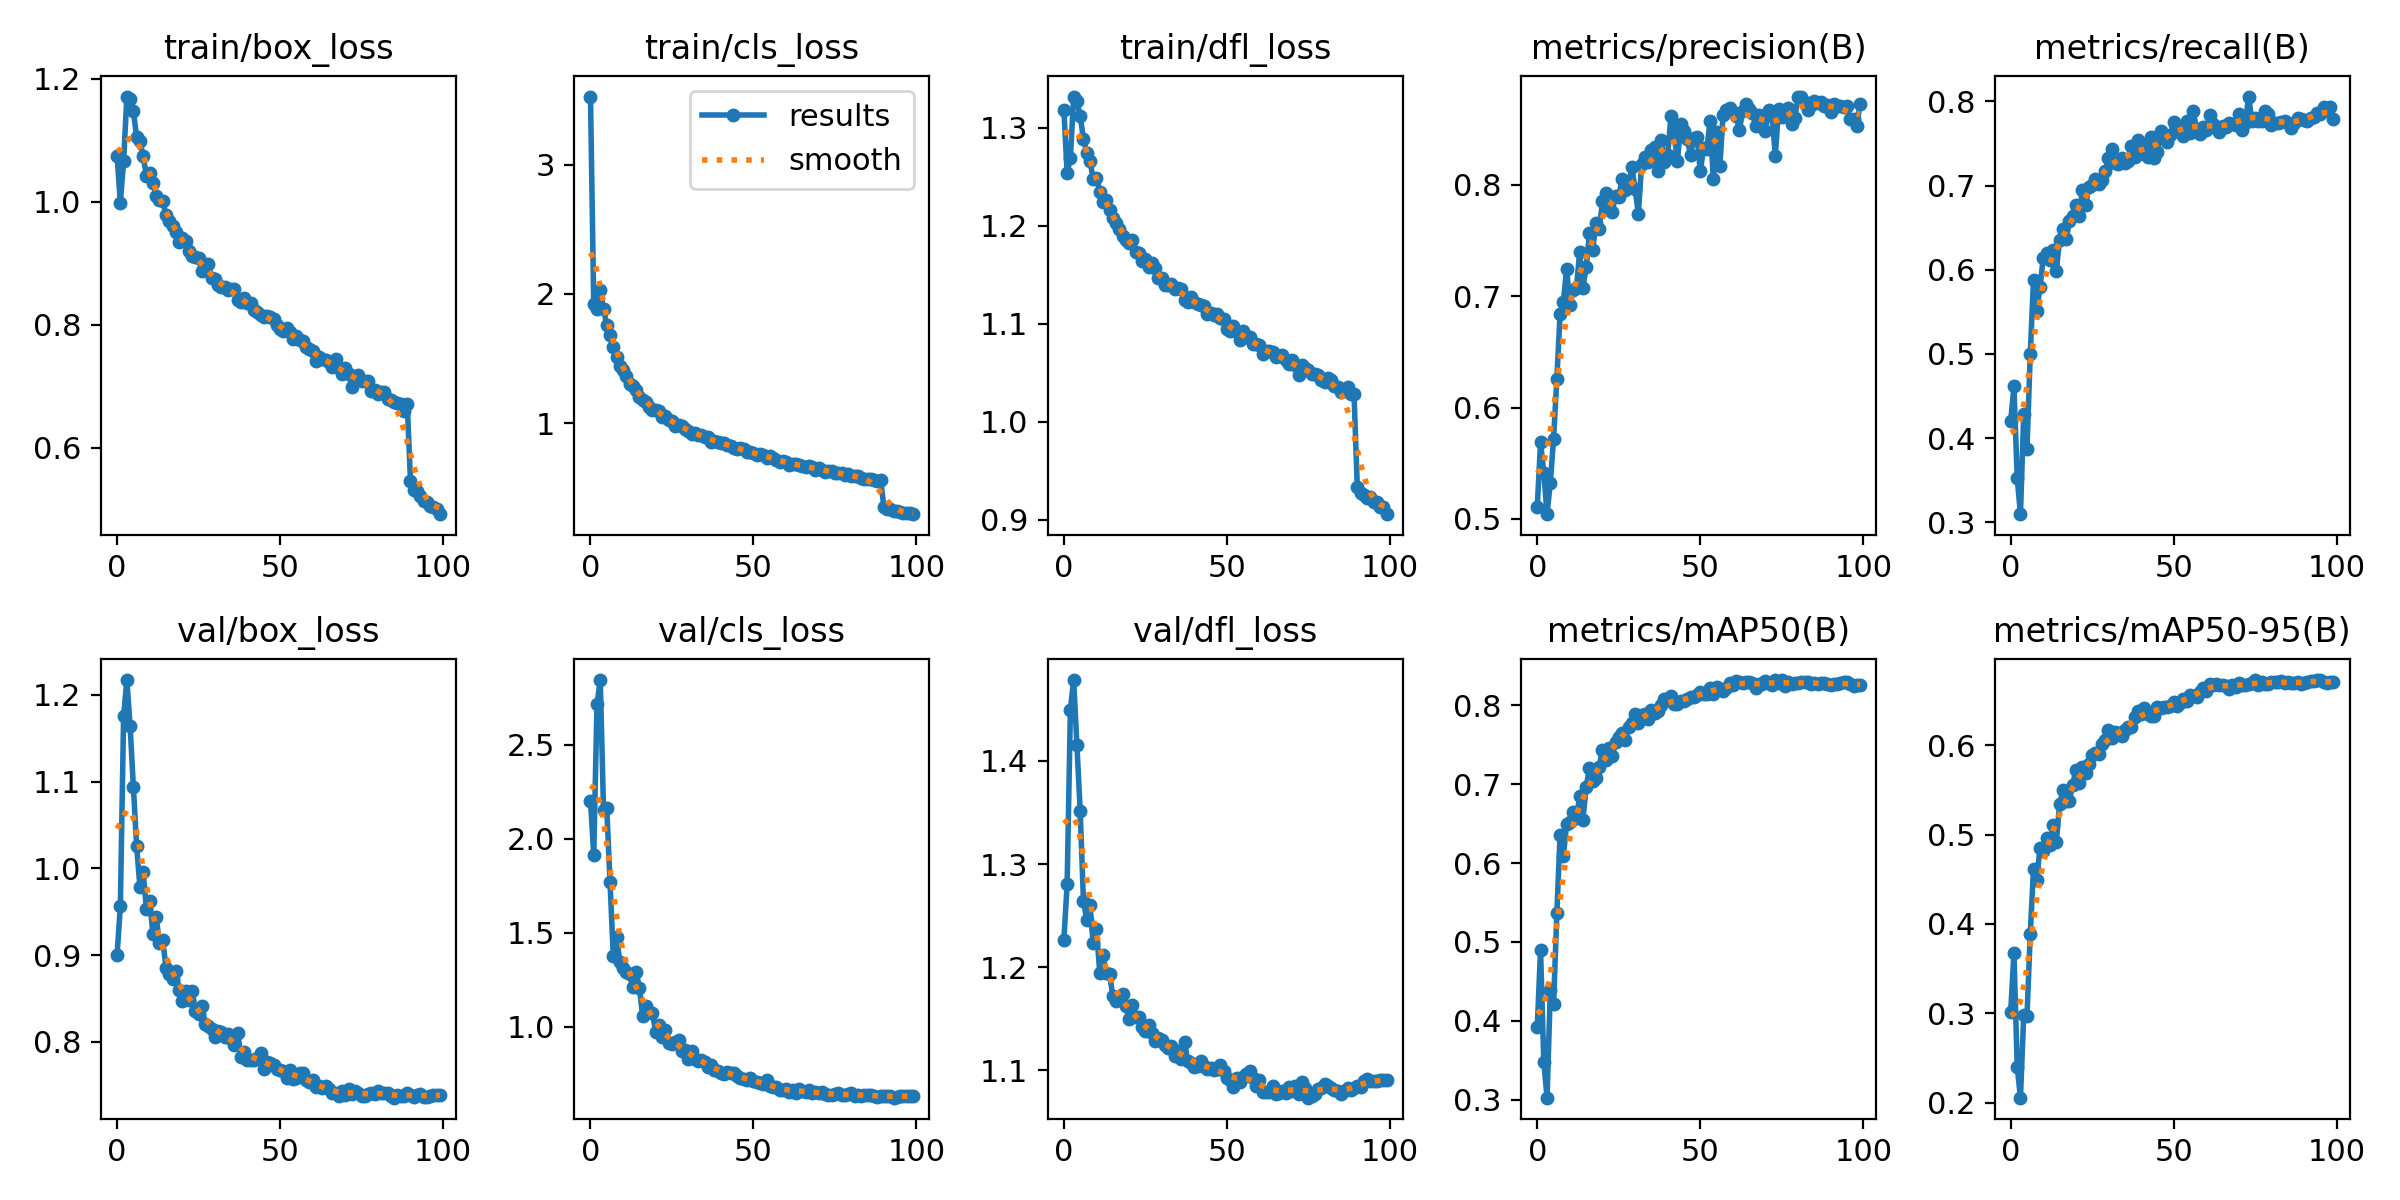

In [29]:
from IPython.display import display, Image

display(Image('/content/runs/detect/train2/results.png'))


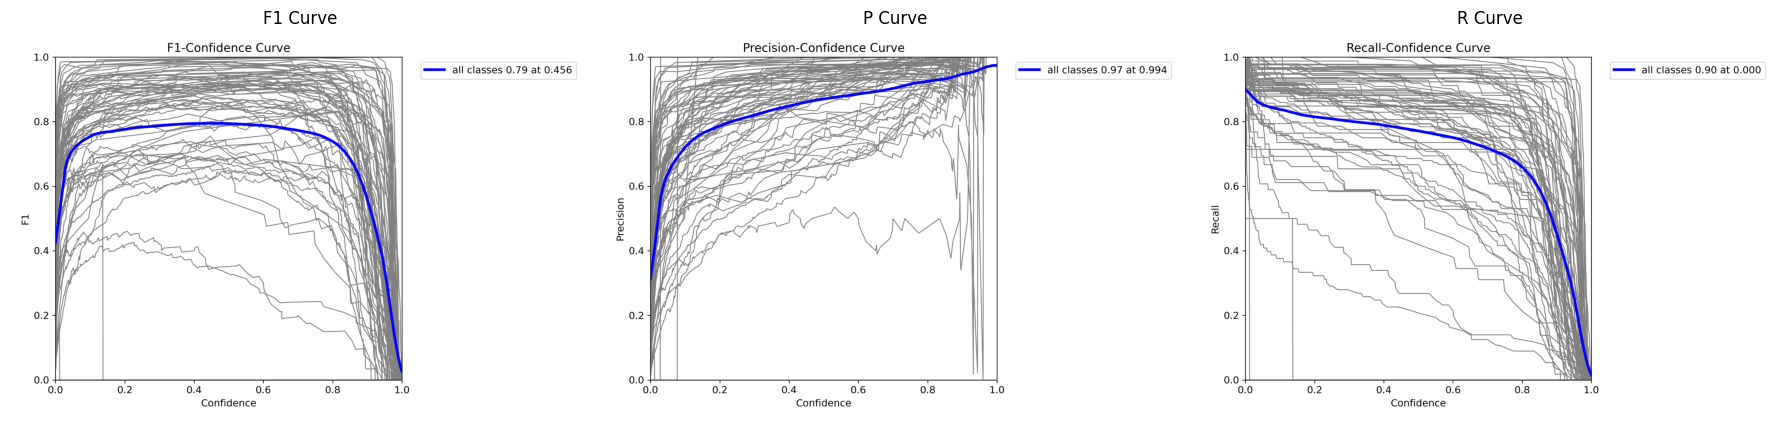

In [31]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
from PIL import Image

# 이미지 파일 경로
f1_curve_path ='/content/runs/detect/train2/F1_curve.png'
p_curve_path = '/content/runs/detect/train2/P_curve.png'
R_curve_path = '/content/runs/detect/train2/R_curve.png'

# 이미지 불러오기
f1_curve_img = Image.open(f1_curve_path)
p_curve_img = Image.open(p_curve_path)
R_curve_img = Image.open(R_curve_path)

# 이미지 크기 조정
# new_width = 1000
# new_height = 800
# # f1_curve_img = f1_curve_img.resize((new_width, new_height))
# # pr_curve_img = pr_curve_img.resize((new_width, new_height))

# 두 이미지 나란히 표시
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
axes[0].imshow(f1_curve_img)
axes[0].set_title('F1 Curve')
axes[0].axis('off')

axes[1].imshow(p_curve_img)
axes[1].set_title('P Curve')
axes[1].axis('off')

axes[2].imshow(R_curve_img)
axes[2].set_title('R Curve')
axes[2].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

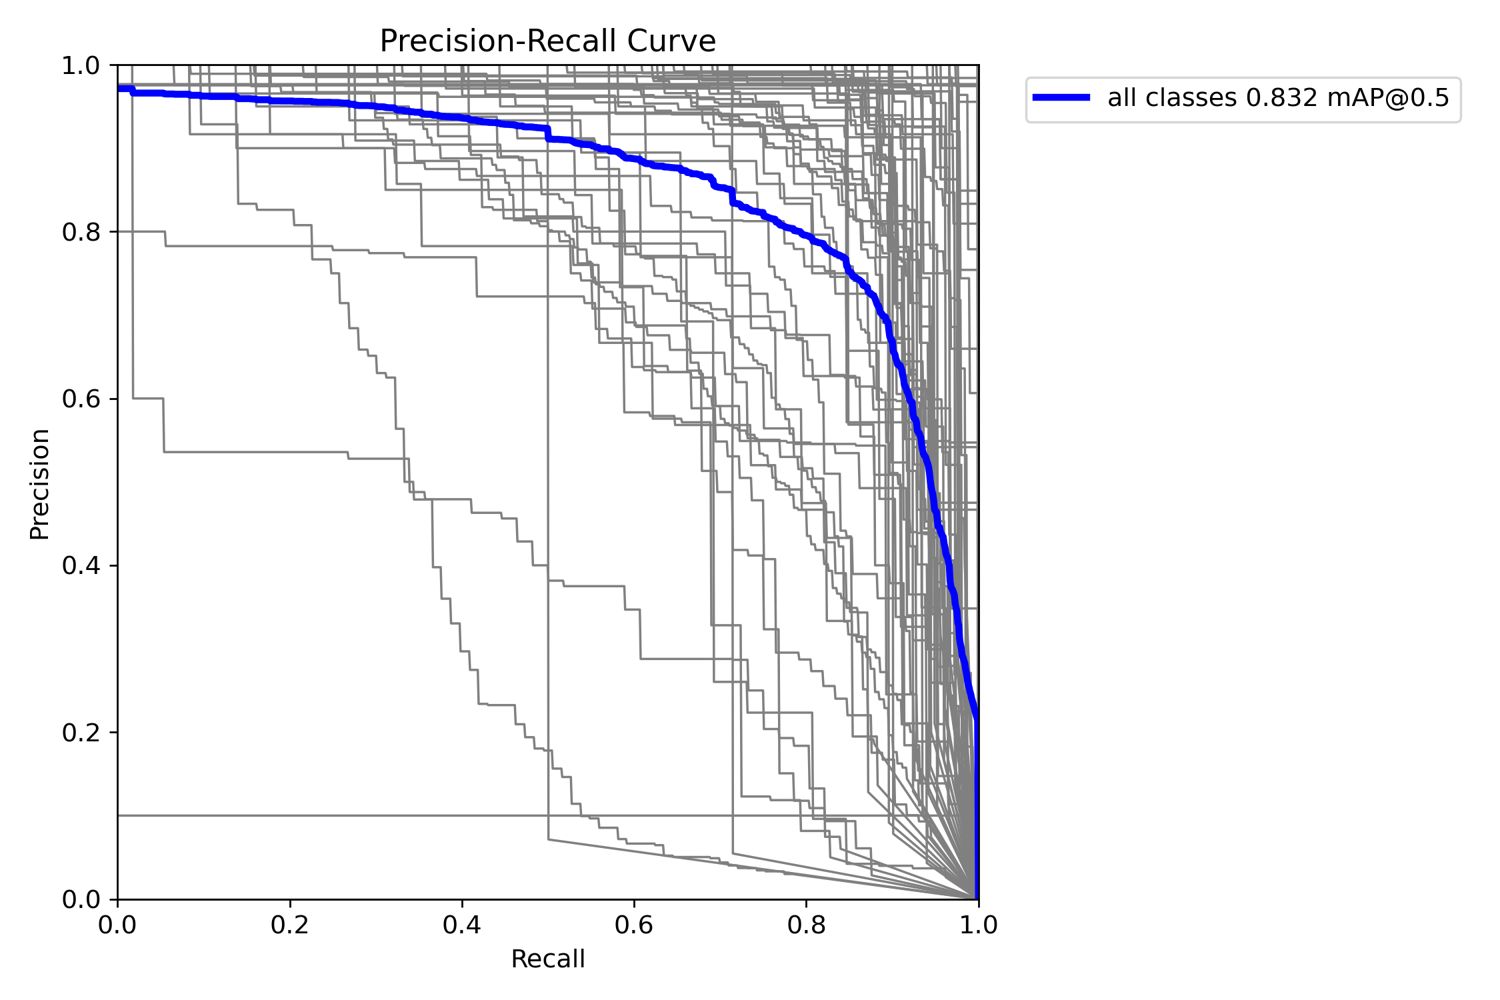

In [32]:
image_path = '/content/runs/detect/train2/PR_curve.png'
img = Image.open(image_path)

new_width = 1500
new_height = 1000
img = img.resize((new_width, new_height))


display(img)

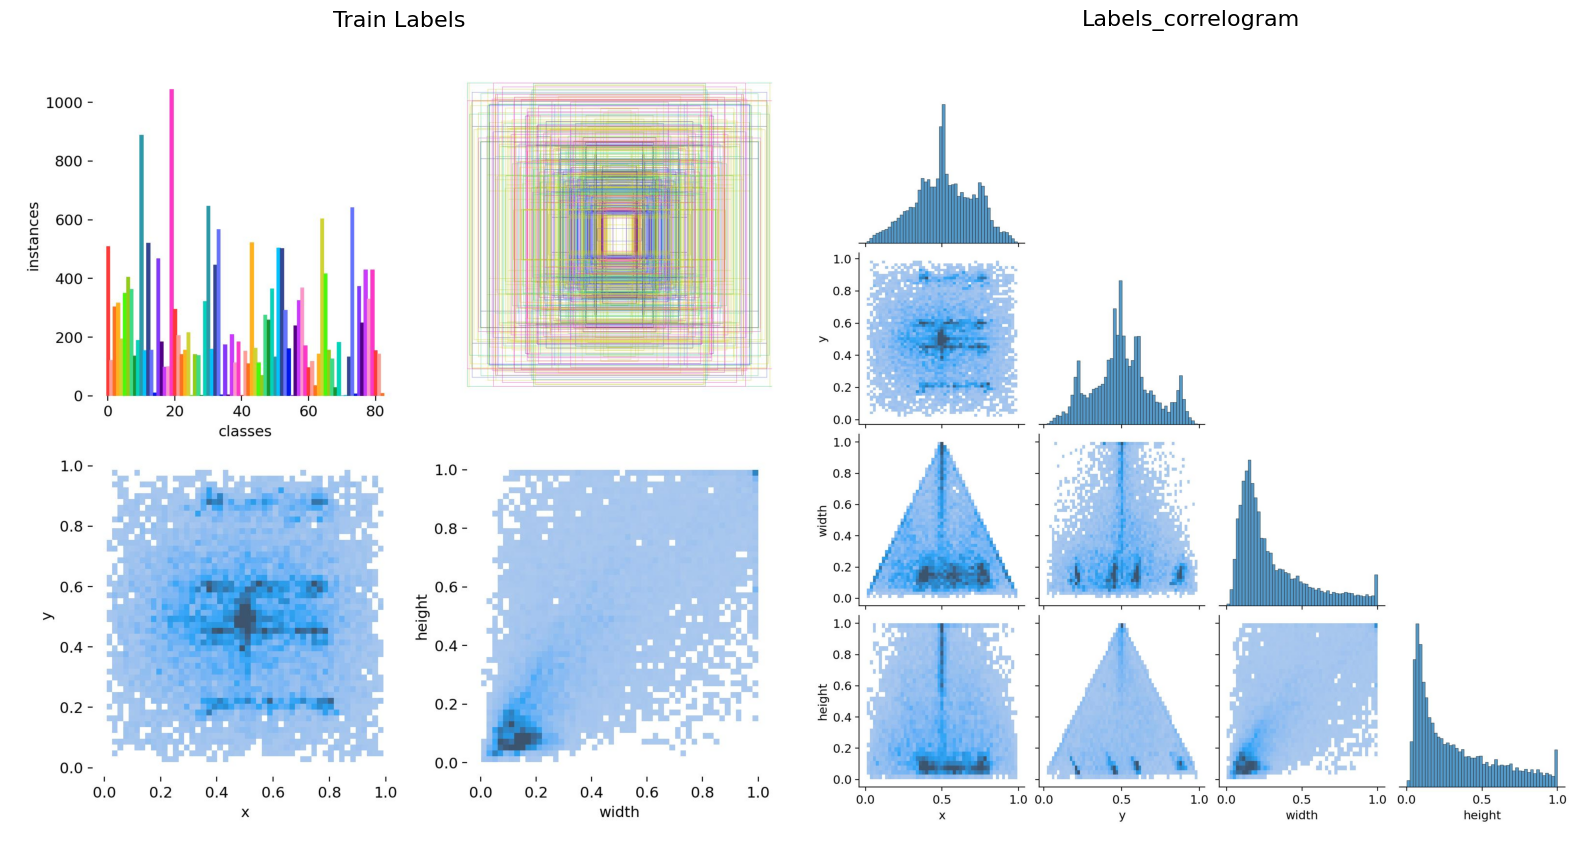

In [33]:
image_labels_path ='/content/runs/detect/train2/labels.jpg'
image_labels_correlogram_path = '/content/runs/detect/train2/labels_correlogram.jpg'

# 이미지 불러오기
image_labels = Image.open(image_labels_path)
image_labels_correlogram = Image.open(image_labels_correlogram_path)

# 이미지 크기 조정
# new_width = 800
# new_height = 800
# image_labels = image_labels.resize((new_width, new_height))
# image_labels_correlogram = image_labels_correlogram.resize((new_width, new_height))

# 두 이미지 나란히 표시
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
axes[0].imshow(image_labels)
axes[0].set_title('Train Labels\n', fontsize=16)
axes[0].axis('off')

axes[1].imshow(image_labels_correlogram)
axes[1].set_title('Labels_correlogram\n', fontsize=16)
axes[1].axis('off')


plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt
from PIL import Image

def show_images_side_by_side(pred_image_path, label_image_path):
    # Load predicted image and label image
    pred_img = Image.open(pred_image_path)
    label_img = Image.open(label_image_path)

    # Create a plot with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))

    # Show the predicted image in the first subplot
    axes[0].imshow(pred_img)
    axes[0].set_title('Image Predict\n', fontsize=16)
    axes[0].axis('off')

    # Show the label image in the second subplot
    axes[1].imshow(label_img)
    axes[1].set_title('Image Labels\n', fontsize=16)
    axes[1].axis('off')

    # Display the plot
    plt.show()


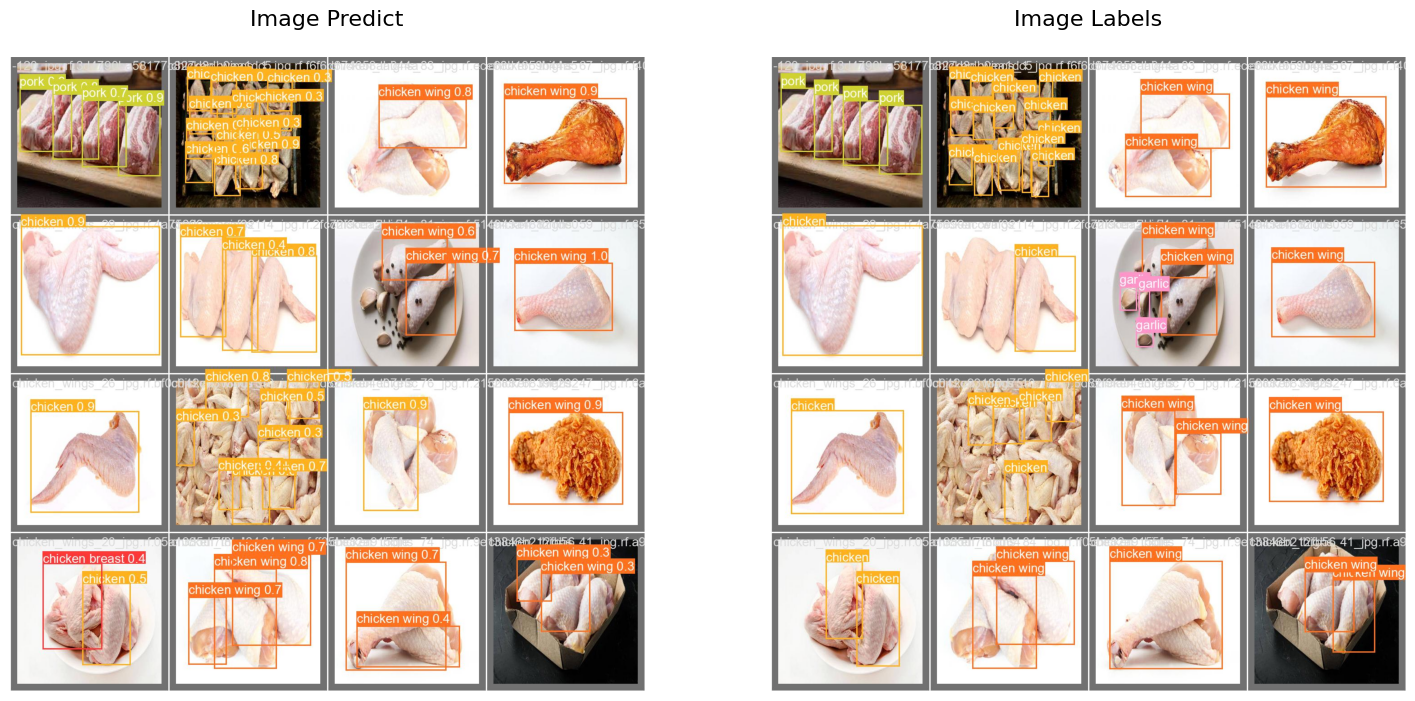

In [35]:
val_pred = '/content/runs/detect/train2/val_batch0_pred.jpg'
val_label = '/content/runs/detect/train2/val_batch0_labels.jpg'
show_images_side_by_side(val_pred, val_label)

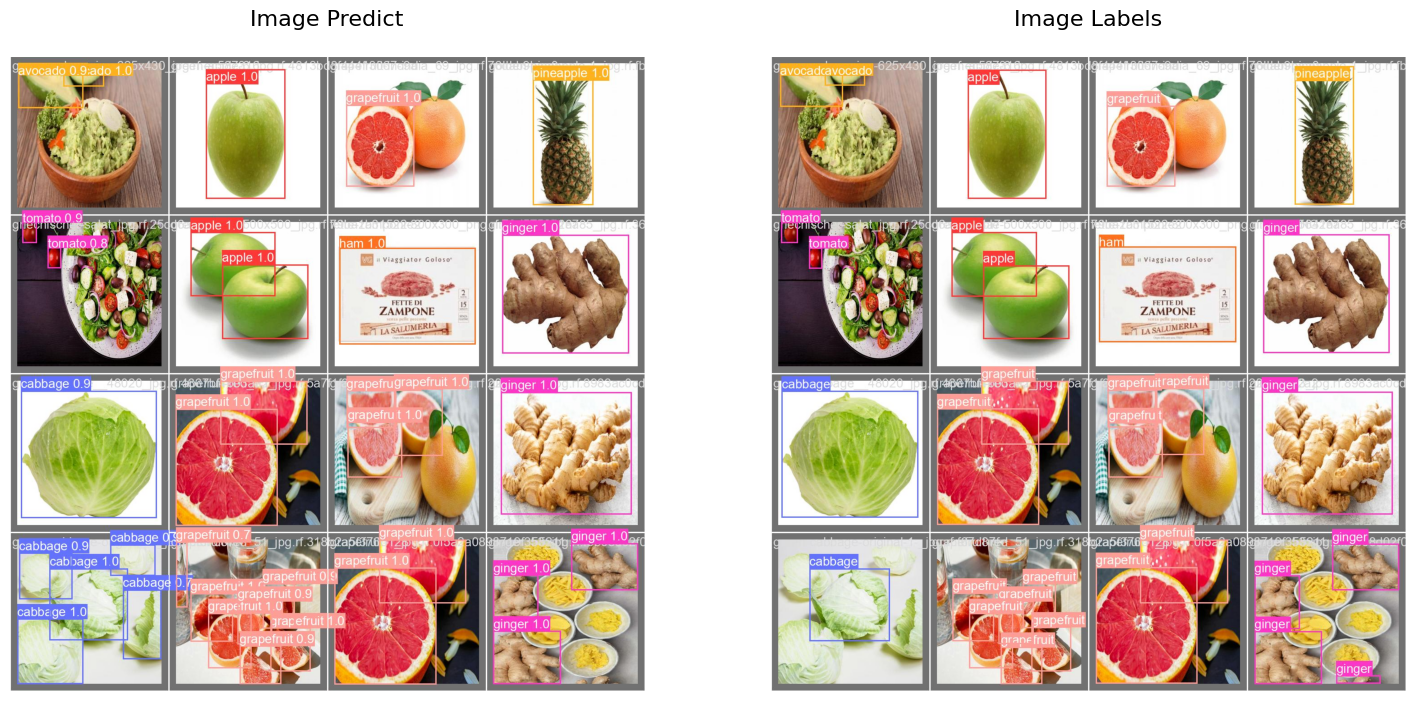

In [36]:
val_pred = '/content/runs/detect/train2/val_batch1_pred.jpg'
val_label = '/content/runs/detect/train2/val_batch1_labels.jpg'
show_images_side_by_side(val_pred, val_label)

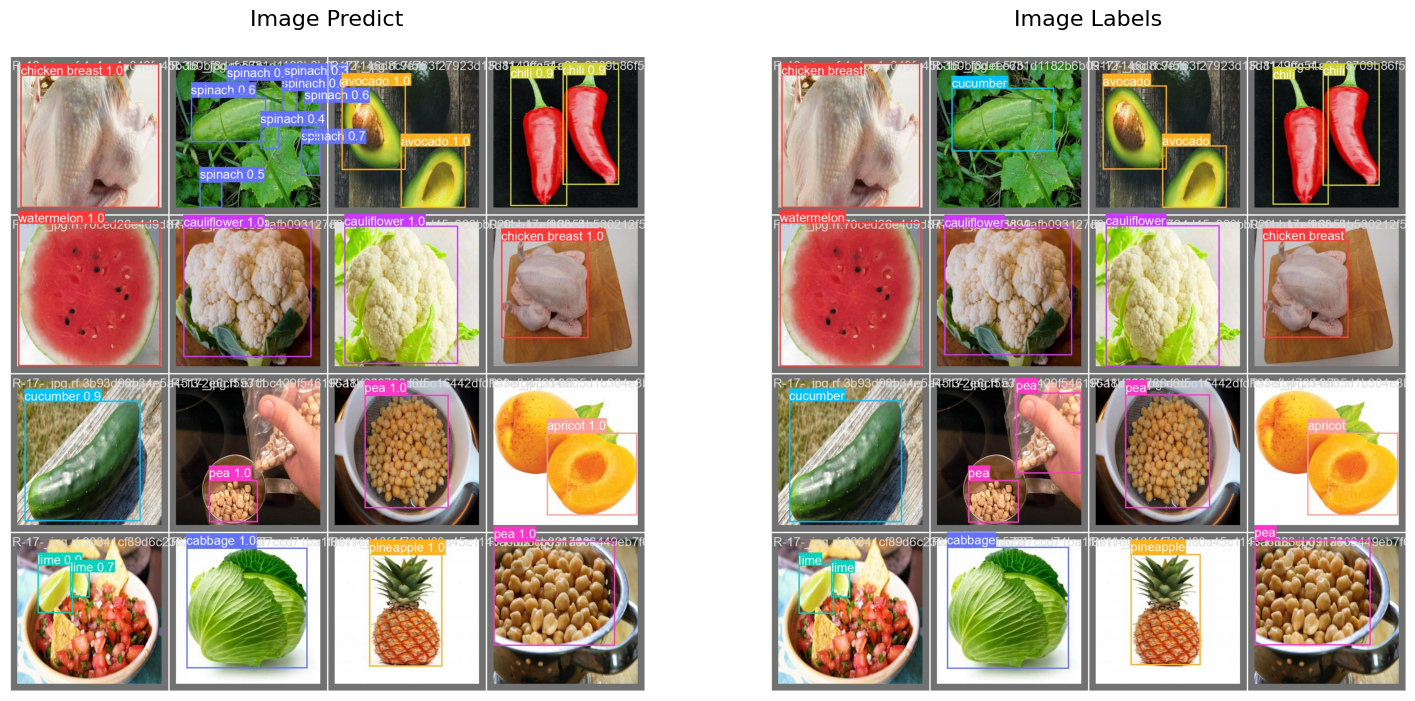

In [37]:
val_pred = '/content/runs/detect/train2/val_batch2_pred.jpg'
val_label = '/content/runs/detect/train2/val_batch2_labels.jpg'
show_images_side_by_side(val_pred, val_label)


### 테스트 데이터 예측

In [38]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def visualize_predicted_images(predict_folder, image_size=(100, 100)):
    predict_images = os.listdir(predict_folder)

    num_images = min(len(predict_images), 16)
    num_rows = (num_images + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(14, 14))

    for i, image_name in enumerate(predict_images):
        if i >= num_images:
            break

        predict_image_path = os.path.join(predict_folder, image_name)

        predict_image = Image.open(predict_image_path).resize(image_size)

        row_idx = i // 4
        col_idx = i % 4
        axes[row_idx, col_idx].imshow(predict_image)
        axes[row_idx, col_idx].set_title(f'Image {i+1}')
        axes[row_idx, col_idx].axis('off')

    plt.suptitle('Model Predictions on Test Images\n', fontsize=16)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.tight_layout()
    plt.show()


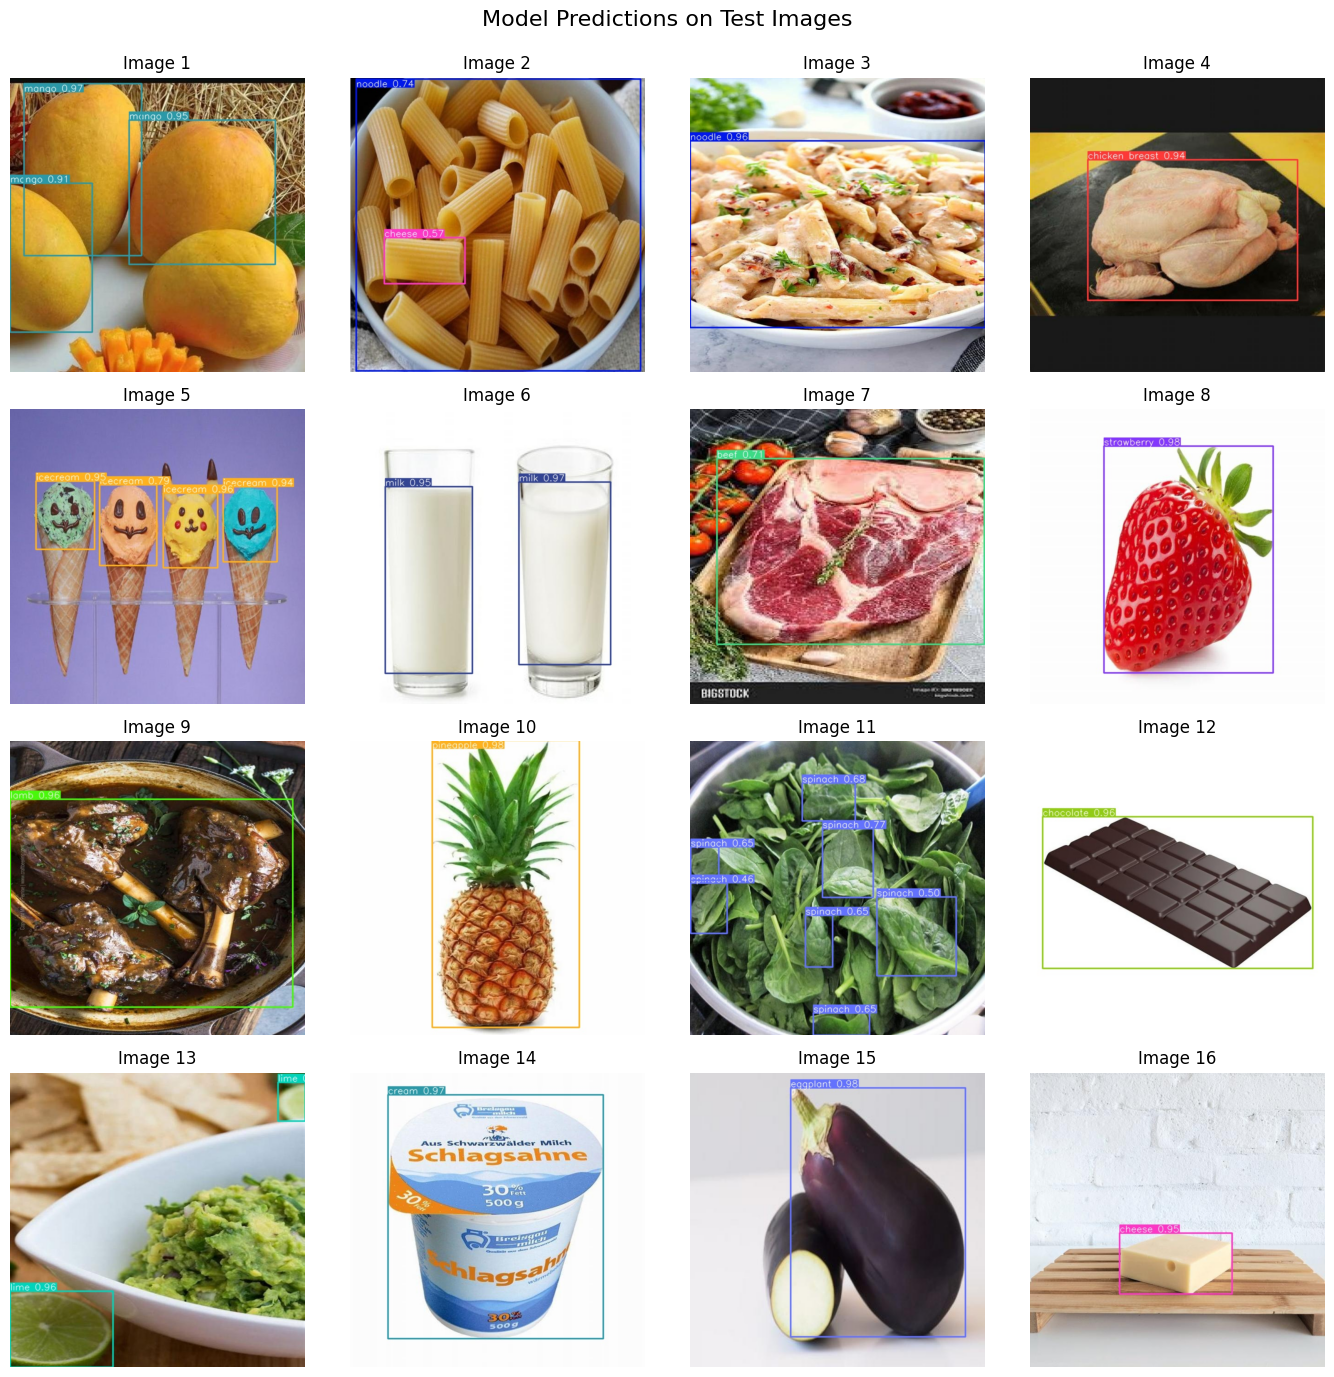

In [39]:
predict_folder = '/content/runs/detect/predict/'
image_size = (800, 800)
visualize_predicted_images(predict_folder, image_size=image_size)
